<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules.-Run-once" data-toc-modified-id="Import-modules.-Run-once-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import modules. Run once</a></span></li><li><span><a href="#Set-up-devices.-Run-once" data-toc-modified-id="Set-up-devices.-Run-once-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Set up devices. Run once</a></span></li><li><span><a href="#Spec.,-1D" data-toc-modified-id="Spec.,-1D-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Spec., 1D</a></span></li><li><span><a href="#Spec.-vs-Flux,-2D" data-toc-modified-id="Spec.-vs-Flux,-2D-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Spec. vs Flux, 2D</a></span></li><li><span><a href="#Spec.-vs-Power,-2D" data-toc-modified-id="Spec.-vs-Power,-2D-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Spec. vs Power, 2D</a></span></li><li><span><a href="#2D-spectroscopy-Multiple-qubits-measurement" data-toc-modified-id="2D-spectroscopy-Multiple-qubits-measurement-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2D spectroscopy Multiple qubits measurement</a></span></li><li><span><a href="#S21-continuous-in-CW-vs-Time" data-toc-modified-id="S21-continuous-in-CW-vs-Time-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>S21 continuous in CW vs Time</a></span></li><li><span><a href="#Auto-Spec" data-toc-modified-id="Auto-Spec-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Auto Spec</a></span></li><li><span><a href="#Spec.-vs-Tilted-Flux,-2D" data-toc-modified-id="Spec.-vs-Tilted-Flux,-2D-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Spec. vs Tilted Flux, 2D</a></span></li><li><span><a href="#Playground!-Mess-around-here." data-toc-modified-id="Playground!-Mess-around-here.-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Playground! Mess around here.</a></span></li></ul></div>

# Import modules. Run once

In [2]:
# run once
# %matplotlib qt5

# import system modules
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os.path
import numpy as np
import visa
import json

# Add path
sys.path.append('..\Instrument Driver')
sys.path.append('..\Helper')

# custom modules
import myplots_py3, myutils 

# Set up devices. Run once

In [3]:
# instrument drivers
import SIM          
import AgilentN5230A
import LSCI332S
import HittiteHMC
import AgilentMXG
import time
import SynthHD
import KeysightP9372A

# instrument instances. Make device objects.

#pna = AgilentN5230A.AgilentN5230A(16)
pna = KeysightP9372A.KeysightP9372A('PXI10::0-0.0::INSTR')
pna.connect()

simq2 = SIM.SIM('COM3', channel = 1)
simq3 = SIM.SIM('COM3', channel = 2)

spec = HittiteHMC.HittiteHMC("USB",4)
#spec = HittiteHMC.HittiteHMC('GPIB',10)
#spec = SynthHD.SynthHD(7)
#spec.setChannel(0) # for SynthHD,0= channel A,1=channel B
#spec.pwrOn()
#spec = AgilentMXG.AgilentMXG(30)
#sim_glb = SIM.SIM(17, channel=2) # DR1 
#sim_3 = SIM.SIM(15, channel = 2) # ADR1
#sim_1 = SIM.SIM(15 , channel=1)
# sim_glb = SIM.SIM(15, channel=3)
# sim_glb =  SIM.SIM('COM7', channel = 2)
#sim_chip = SIM.SIM(15, channel=1)
# sim_p = Agilent33250A.Agilent33250A(13)
# sim_1 = SIM.SIM(16, channel = 1)
# sim_2 = SIM.SIM(16, channel = 2)
# lsci = LSCI332S.LSCI332S(2)
# sim_1 = SIM.SIM('COM3', channel = 1) #ADR1

# fridge type
fridgeType = 'ADR1'   # options: 'ADR2', 'BF', 'DR1'

VisaIOError: VI_ERROR_RSRC_BUSY (-1073807246): The resource is valid, but VISA cannot currently access it.

In [ ]:
# float(lsci.tempGet('B'))
# spec.pwrOff()
fridgeType = 'ADR1'

# Spec., 1D

In [4]:
# sim_1 = SIM.SIM(16, channel = 4)
SIM.SIM?
# sim_2 = SIM.SIM(16, channel = 2)

In [124]:
sim_1.setVoltage(volt_glb)

sim_2.setVoltage(volt_chip)

volt_glb = -0.3
volt_chip = 0.55

NameError: name 'spec' is not defined

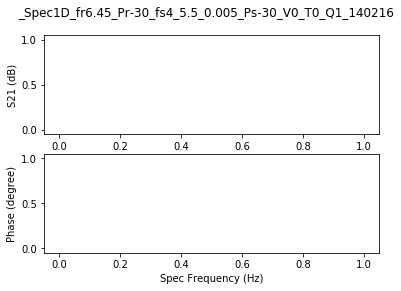

In [4]:
################################################################################
# set up parameters
readoutFreq = 6.450e9 # 6.032e9 # #cav Freq.
readoutPwr = -30
numPoints, IFbandwidth, avg = 201, 500, 2
# startFreq, endFreq, stepFreq = 4e9, 5.5e9, 5e6
startFreq, endFreq, stepFreq = 4e9, 5.5e9, 5e6
specPwr =  -10 #nominal power from mw source (good to try 0dB as a starting place)
fixedAtt = -20  # additional fixed attenuator if any
volt_glb = 0
volt_chip = 0
sweepNumber = 1 # 1: one-way, 2: round-trip, 3: one-ways + roundtrip, 4: two roundtrip, ...


sampleID = ''
suffix = 'Q1'
save_path = r'Z:\User\Jaseung\projects\LHL_ring_res\Measurement\RRW1\Chip1'
#save_path = r'Z:\Experiments\Dirty Aluminum\Qubit\101519Nb_qubit1'
#save_path = r'C:\Users\Lab User\Desktop\Crap, please organize\SFQFlipIV\MCMunknown'
#save_path = r'Z:\PHY-PRL-Labshare\Experiments\Dirty Aluminum\Super_Inductor\0501'
#save_path = r'Z:\Experiments\Dirty Aluminum\Super_Inductor\0312'


##################################################################################

# dictionary for parameters to be saved in log file
specPwr_total = specPwr + fixedAtt
header = 'freq (Hz) mag(dB) phase(degree) real imag'
para = dict([('readout Freq (Hz)',readoutFreq),('readout Power (dBm)', readoutPwr),('numPoints',numPoints),
             ('IFbandwidth (Hz)', IFbandwidth),('avg',avg),('Spec freq start (Hz)',startFreq),('Spec freq end (Hz)',endFreq),
             ('Spec step Freq (Hz)',stepFreq),('Spec power(dBm)', specPwr_total),('volt_glb (V)',volt_glb), ('volt_chip (V)',volt_chip), 
             ('header',header)])


# file setup
#if fridgeType=='ADR2':
#    FAA = float(lsci.tempGet('B')) # get temperature
#else :
FAA = 0    
timeStr = time.strftime("%H%M%S")
baseStr = sampleID + '_Spec1D_fr{:.9g}_Pr{:.9g}_fs{:.9g}_{:.9g}_{:.9g}_Ps{:.9g}_V{:.3g}_T{:.3g}_{}_{}' 
baseFileName = baseStr.format(readoutFreq/1e9, readoutPwr, startFreq/1e9, endFreq/1e9, stepFreq/1e9,
                              specPwr_total, volt_glb, FAA, suffix, timeStr)
dataFileName  = os.path.join(save_path, baseFileName + '.dat')
logFileName = os.path.join(save_path, baseFileName + '.json')

with open(logFileName, 'w') as f_log:
    json.dump(para,f_log,indent=4, sort_keys=True)
f_data = open(dataFileName, 'a')
   
# plot setup
plotobj= myplots_py3.plot1D_2sub(xlabel1 = 'Spec. Frequency (Hz)', ylabel1='S21 (dB)',
                             xlabel2 = 'Spec Frequency (Hz)',ylabel2='Phase (degree)',
                             title = baseFileName, plotStyle='b-')

# preconfigure instrument
pna.setupMeas()
pna.setSweepType('CW')
pna.setCWFreq(readoutFreq)
pna.setPwr(readoutPwr)
pna.avgCount(avg)
pna.numPoints(numPoints)
pna.setIF(IFbandwidth)
pna.pwrOn()

spec.pwrOn()
spec.setPwr(specPwr)
#sim_1.setVoltage(volt_glb)

# sim_2.setVoltage(volt_chip)
time.sleep(2)

# data initialization
xdata, ydata1, ydata2 = np.array([]), np.array([]),np.array([])

# sweeper obj
sweeper = myutils.Sweeper1D(start=startFreq, end=endFreq, step=stepFreq,
                            sweepNum=sweepNumber)

################ sweep start ################
while not sweeper.stop(): 
    clear_output()
    print('fs={}'.format(sweeper.curr_val))
    
    # configure
    pna.avgClear()
    ##################################  
    spec.setFreq(sweeper.curr_val)
    
    # fetch data from PNA
    freq, S21= pna.getData(cplx=True) # S21 in linear scale
    
    # S21 conversion
    S21_real, S21_imag = np.real(S21), np.imag(S21)
    S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
    S21_mag_log = 20.0 * np.log10(S21_mag)    # dB
    S21_mag_log_avg = np.average(S21_mag_log) 
    S21_phase_avg = np.average(S21_phase)
    
    # create spec freq, S21 1D array
    xdata = np.append(xdata, sweeper.curr_val)
    ydata1 = np.append(ydata1, S21_mag_log_avg)
    ydata2 = np.append(ydata2, S21_phase_avg)
    
    # plot and update
    plotobj.update(xdata, ydata1, xdata, ydata2)
    
    # save data in each iteration
    string = '{:.9g}\t{:.6g}\t{:.6g} \n'.format(sweeper.curr_val, S21_mag_log_avg,S21_phase_avg)
    f_data.write(string)
    
    # update sweep
    sweeper.update()
############## sweep end #########################    

# Post measurement    
pna.pwrOff()
spec.pwrOff()
#sim_glb.setVoltage(0)
pna.setSweepType(mode='linear')

f_data.close()
f_log.close()
plotobj.fig.savefig(os.path.join(save_path, baseFileName + '.png'))
print('Measurement complete!!!')

In [25]:
pna.setSweepType(mode='linear')

# Spec. vs Flux, 2D

In [12]:
from scipy.optimize import curve_fit

# measure resonance dip and do fit. Get the frequency at 3dB points
def getBiasFreq():
    
    pna.setSweepType(mode='linear')
    time.sleep(.1)
    pna.setFreqStartEnd(4.713e9, 4.717e9)
    time.sleep(.1)
    pna.setPwr(-30)
    time.sleep(.1)
    pna.avgCount(10)
    time.sleep(.1)
    pna.numPoints(401)
    time.sleep(.1)
    pna.setIF(500)
    time.sleep(.1)
    pna.avgClear()
    time.sleep(.1)
        
    freq, S21= pna.getData(cplx=True)
    time.sleep(.1)
    S21_mag = np.sqrt(np.real(S21)**2 + np.imag(S21)**2)
    S21_mag_log = np.log10(S21_mag)
    
    f0 = freq[np.argmin(S21_mag_log)]  # find frequency at minimum S21, i.e. dip
    
#     pna.setSweepType(mode='CW')
    return f0 

# def doLorenzianFit(freq, S21_mag_log):
#     # set initial value
#     p0 =[]
#     p0.append(freq(np.argmin(S21_mag_log))) # f0
    
#     popt, pcov = curve_fit(lorenzin, freq, S21_mag, p0)
#     return popt, pcov


In [50]:
from scipy.optimize import curve_fit

# measure resonance dip and do fit. Get the frequency at 3dB points
def getBiasFreq_BaseSub():
    
    pna.setSweepType(mode='linear')
    pna.setFreqStartEnd(3.97e9, 4e9)
    pna.setPwr(-45)
    pna.avgCount(5)
    pna.numPoints(1501)
    pna.setIF(150)
    pna.avgClear()
        
    freq, S21= pna.getData(cplx=True)
    S21_mag = np.sqrt(np.real(S21)**2 + np.imag(S21)**2)
    S21_mag_log = np.log10(S21_mag)
    S21_mag_log_BaseSub = S21_mag_log - ((-7.2305e-23)*freq**3+(8.6463e-13)*freq**2+(-0.0034463)*freq+4.5789e6)
    
    f0 = freq[np.argmin(S21_mag_log)]  # find frequency at minimum S21, i.e. dip
    
#     pna.setSweepType(mode='CW')
    return f0 

# def doLorenzianFit(freq, S21_mag_log):
#     # set initial value
#     p0 =[]
#     p0.append(freq(np.argmin(S21_mag_log))) # f0
    
#     popt, pcov = curve_fit(lorenzin, freq, S21_mag, p0)
#     return popt, pcov


In [34]:
getBiasFreq_BaseSub()

3981541666.6666665

In [16]:
####################################################################################################################
# set up parameters - Could be used for charge tuning
readoutPwr = -30
readoutFreq = getBiasFreq() #Might not getBiasFreq() need this for charge tuning since qubit will only tune
# print(readoutFreq)
numPoints, IFbandwidth, avg = 201, 10000, 2
startFreq, endFreq, stepFreq = 2.7e9, 3.1e9, 2e6 #startFreq, endFreq, stepFreq = 3.5e9, 6.5e9, 1000e6
specPwr = -30
fixedAtt = -10
startVolt, endVolt, stepVolt = -0.1, 0.2, 0.02
endV = 0

sampleID = ''
suffix = ''
commentStr = ''
#save_path =  r'Z:\User\Jaseung\projects\CSFQ\measurement\W19\A4\ADR2'
save_path = r'Z:\Experiments\Dirty Aluminum\Qubit\110220NbB_I9'
#save_path = r'Z:\Experiments\Dirty Aluminum\Qubit\091119Nb_qubit6'
####################################################################################################################

# dictionary for parameters to be saved in log file.
specPwr_total = specPwr + fixedAtt
xID, xStart, xEnd, xStep = 'Voltage (V)', startVolt, endVolt, stepVolt
yID, yStart, yEnd, yStep = 'Spec. Frequency (Hz)',startFreq, endFreq, (endFreq-startFreq)/(numPoints-1)
para = dict([('xID', xID), ('xStart', xStart), ('xEnd', xEnd)
             , ('yID', yID), ('yStart', yStart), ('yEnd', yEnd), ('Spec power', specPwr_total)
             , ('readout Freq (Hz)',readoutFreq),('readout Power (dBm)', readoutPwr)
             , ('numPoints',numPoints), ('IFbandwidth start (Hz)', IFbandwidth),('IFbandwidth end (Hz)', IFbandwidth)
             , ('avg',avg), ('comment', commentStr)])

# file setup
if fridgeType=='ADR2':
    FAA = float(lsci.tempGet('B')) # get temperature
else:
    FAA = 0
timeStr = time.strftime("%H%M%S")

baseStr = sampleID + '_Spec2D_fr{:.9g}_Pr{:.9g}_fs{:.9g}_{:.9g}_{:.9g}_Ps{:.9g}_V{:.6g}_{:.3g}_{:.3g}_T{:.3g}_{}_{}'
baseFileName = baseStr.format(readoutFreq/1e9, readoutPwr, startFreq/1e9, endFreq/1e9, stepFreq/1e9, specPwr_total,
                              startVolt, endVolt, stepVolt, FAA, suffix,timeStr)
dataFileName1  = os.path.join(save_path, baseFileName + '_mag.dat')
dataFileName2  = os.path.join(save_path, baseFileName + '_phase.dat')
logFileName =  os.path.join(save_path, baseFileName + '.json')
with open(logFileName, 'w') as f_log:
    json.dump(para,f_log,indent=4, sort_keys=True)

f_log = open(logFileName, 'a') 

# plot setup
plotobj= myplots_py3.plot2D_4sub(xlabel1 = '', ylabel1='S21 (dB)', 
                             xlabel2 = 'Spec Frequency(Hz)', ylabel2='Phase(degree)',
                             xlabel3 = 'Volt (V)', ylabel3='Spec Frequency(Hz)',
                             xlabel4 = 'Volt (V)', ylabel4='Spec Frequency(Hz)',
                             title = baseFileName, figsize=(12,8))

# preconfigure instrument
pna.setupMeas()
time.sleep(.1)
pna.setSweepType(mode='CW')
time.sleep(.1)
# pna.setCWFreq(readoutFreq)
pna.setPwr(readoutPwr)
time.sleep(.1)
pna.avgCount(avg)
time.sleep(.1)
pna.numPoints(numPoints)
time.sleep(.1)
pna.setIF(IFbandwidth)
time.sleep(.1)
pna.pwrOn()
time.sleep(.1)

spec.setPwr(specPwr)
spec.pwrOn()

# data initialization
data1_2D, data2_2D = np.array([]), np.array([])

################ sweep start ################
#for specFreq in arange(startFreq, endFreq + stepFreq, stepFreq): # traverse in [pmin, pmax].
for volt in np.arange(startVolt, endVolt+stepVolt, stepVolt):
    #configure para
    sim_1.setVoltage(volt)
    spec.pwrOff()
    time.sleep(2)
    readoutFreq = getBiasFreq() # find bias point from cavity resonance curve
    #readoutFreq = getBiasFreq_BaseSub() # 0 is lower freq side, 3dB higher
        
    pna.setSweepType(mode='CW')
    time.sleep(.1)
    pna.setCWFreq(readoutFreq)
    time.sleep(.1)
    pna.setPwr(readoutPwr)
    time.sleep(.1)
    pna.avgCount(avg)
    time.sleep(.1)
    pna.numPoints(numPoints)
    time.sleep(.1)
    pna.setIF(IFbandwidth)
    time.sleep(.1)
    spec.pwrOn()

    # data initialization
    xdata1, ydata1, ydata2 = np.array([]), np.array([]), np.array([])
    
    for specFreq in np.arange(startFreq, endFreq+stepFreq, stepFreq):
        # configure
        spec.setFreq(specFreq)
        pna.avgClear()
        time.sleep(.1)
    
        # fetch data from PNA
        freq, S21= pna.getData(cplx=True) # S21 in linear scale
        time.sleep(.1)
    
        # S21 conversion
        S21_real, S21_imag = np.real(S21), np.imag(S21)
        S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
        S21_mag_log = 20.0 * np.log10(S21_mag)    # dB

        S21_mag_log_avg = np.average(S21_mag_log) 
#        S21_mag_log_subavg = S21_mag_log-np.average(S21_mag_log) 
        S21_phase_avg = np.average(S21_phase)

        xdata1 = np.append(xdata1, specFreq)
        ydata1 = np.append(ydata1, S21_mag_log_avg)
        ydata2 = np.append(ydata2, S21_phase_avg)
#        ydata2 = np.append(ydata2, S21_mag_log_bgsub)

        # plot and update
#        plotobj.update1D(xdata1, ydata1, xdata1, ydata2)

    
    if data1_2D.size == 0: # when S21_mag_2D is empty
        data1_2D = ydata1 # make 2D array
        data1_2D.shape = (data1_2D.size, 1)
        data2_2D = ydata2
        data2_2D.shape = (data2_2D.size, 1)
        
    else:
        data1_2D = np.column_stack((data1_2D, ydata1))
        data2_2D = np.column_stack((data2_2D, ydata2))
             
    # plot and update
    extent = [startVolt, volt, startFreq, endFreq]
    plotobj.update2D(data1_2D, data2_2D, extent, cmap='Blues_r')
    
    
    # save data in each iteration
    f_mag = open(dataFileName1, 'wb') 
    f_phase = open(dataFileName2, 'wb') 
    np.savetxt(f_mag, data1_2D, fmt='%.9g', delimiter='\t') 
    np.savetxt(f_phase, data2_2D, fmt='%.9g', delimiter='\t')
    f_mag.close()
    f_phase.close()
     
############## sweep end #########################    

# Post measurement    
pna.pwrOff()
time.sleep(.1)
pna.setSweepType(mode='linear')
spec.pwrOff()
sim_1.setVoltage(endV)
f_log.close()
plotobj.fig.savefig(os.path.join(save_path, baseFileName + '.png'))

..\Helper\myplots_py3.py:140: UserWarning: Attempting to set identical left == right == -0.1 results in singular transformations; automatically expanding.
  self.axesimage1 = self.axes3.matshow(array1_2D, cmap=cmap, extent=extent, origin='lower', aspect='auto')
..\Helper\myplots_py3.py:141: UserWarning: Attempting to set identical left == right == -0.1 results in singular transformations; automatically expanding.
  self.axesimage2 = self.axes4.matshow(array2_2D, cmap=cmap, extent=extent, origin='lower', aspect='auto')


# Spec. vs Power, 2D

In [70]:
####################################################################################################################
# set up parameterss
readoutPwr = -40
readoutFreq = 6.032e9 #getBiasFreq()
# print(readoutFreq)
numPoints, IFbandwidth, avg = 101, 500, 2
startFreq, endFreq, stepFreq = 4e9, 5.5e9, 5e6 #startFreq, endFreq, stepFreq = 3.5e9, 6.5e9, 1000e6
startPwr, endPwr, stepPwr = -10, 0, 1
fixedAtt = -20
#volt_glb =0
#endV = 0

commentStr = ''
sampleID = '07302020_M2_Q6_60'
suffix = 'ChargeSensitive_Moat'
save_path = r'Z:\User\Vito\Flip_Chip\QP_MCM\Data\7_27_20_ADR1_CoolDown\M2_VI02\Spec'

#save_path =  r'Z:\User\Jaseung\projects\CSFQ\measurement\W11\A7\ADR2'
#save_path = r'Z:\PHY-PRL-Labshare\Experiments\Dirty Aluminum\RF_SQUID\0913'
#save_path = r'Z:\Experiments\Dirty Aluminum\Super_Inductor\0312'
#save_path = r'Z:\Experiments\Dirty Aluminum\Qubit\091119Nb_qubit8'
####################################################################################################################

# dictionary for parameters to be saved in log file.

xID, xStart, xEnd, xStep = 'Power (dBm)', startPwr, endPwr, stepPwr
yID, yStart, yEnd, yStep = 'Spec. Frequency (Hz)',startFreq, endFreq, (endFreq-startFreq)/(numPoints-1)
para = dict([('xID', xID), ('xStart', xStart), ('xEnd', xEnd)
             , ('yID', yID), ('yStart', yStart), ('yEnd', yEnd), ('Spec fixed att.', fixedAtt)
             , ('readout Freq (Hz)',readoutFreq),('readout Power (dBm)', readoutPwr)
             , ('numPoints',numPoints), ('IFbandwidth start (Hz)', IFbandwidth),('IFbandwidth end (Hz)', IFbandwidth)
             , ('avg',avg), ('comment', commentStr),('volt_glb (V)',volt_glb)])

# file setup
if fridgeType=='ADR2':
    FAA = float(lsci.tempGet('B')) # get temperature
else:
    FAA = 0
timeStr = time.strftime("%H%M%S")

baseStr = sampleID + '_Spec2D_fr{:.9g}_Pr{:.9g}_fs{:.9g}_{:.9g}_{:.9g}_FixedAtt{:.9g}_V{:.6g}_{:.3g}_{:.3g}_T{:.3g}_{}_{}'
baseFileName = baseStr.format(readoutFreq/1e9, readoutPwr, startFreq/1e9, endFreq/1e9, stepFreq/1e9, fixedAtt,
                              startPwr, endPwr, stepPwr, FAA, suffix, timeStr)
dataFileName1  = os.path.join(save_path, baseFileName + '_mag.dat')
dataFileName2  = os.path.join(save_path, baseFileName + '_phase.dat')
logFileName =  os.path.join(save_path, baseFileName + '.json')
with open(logFileName, 'w') as f_log:
    json.dump(para,f_log,indent=4, sort_keys=True)

f_log = open(logFileName, 'a') 

# plot setup
plotobj= myplots_py3.plot2D_4sub(xlabel1 = '', ylabel1='S21 (dB)', 
                             xlabel2 = 'Spec Frequency(Hz)', ylabel2='Phase(degree)',
                             xlabel3 = 'Power (dBm)', ylabel3='Spec Frequency(Hz)',
                             xlabel4 = 'Power (dBm)', ylabel4='Spec Frequency(Hz)',
                             title = baseFileName, figsize=(12,8))

# preconfigure instrument
pna.setupMeas()
pna.setSweepType(mode='CW')
pna.setCWFreq(readoutFreq)
pna.setPwr(readoutPwr)
pna.avgCount(avg)
pna.numPoints(numPoints)
pna.setIF(IFbandwidth)
pna.pwrOn()

#spec.setPwr(pwr) #specpwr to pwr
spec.pwrOn()

# sim_1.setVoltage(volt_glb)
#sim_chip.setVoltage(volt_chip)
time.sleep(2)

# data initialization
data1_2D, data2_2D = np.array([]), np.array([])

################ sweep start ################
#for specFreq in arange(startFreq, endFreq + stepFreq, stepFreq): # traverse in [pmin, pmax].


for pwr in np.arange(startPwr, endPwr + stepPwr, stepPwr):
    #configure para
    spec.setPwr(pwr)
    time.sleep(2)
    
    #readoutFreq = getBiasFreq()
        
    pna.setSweepType(mode='CW')
    pna.setCWFreq(readoutFreq)
    pna.setPwr(readoutPwr)
    pna.avgCount(avg)
    pna.numPoints(numPoints)
    pna.setIF(IFbandwidth)

    # data initialization
    xdata1, ydata1, ydata2 = np.array([]), np.array([]), np.array([])
    
    for specFreq in np.arange(startFreq, endFreq+stepFreq, stepFreq):
        # configure
        spec.setFreq(specFreq)
        pna.avgClear()
    
        # fetch data from PNA
        freq, S21= pna.getData(cplx=True) # S21 in linear scale
    
        # S21 conversion
        S21_real, S21_imag = np.real(S21), np.imag(S21)
        S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
        S21_mag_log = 20.0 * np.log10(S21_mag)    # dB

        S21_mag_log_avg = np.average(S21_mag_log) 
#        S21_mag_log_subavg = S21_mag_log-np.average(S21_mag_log) 
        S21_phase_avg = np.average(S21_phase)

        xdata1 = np.append(xdata1, specFreq)
        ydata1 = np.append(ydata1, S21_mag_log_avg)
        ydata2 = np.append(ydata2, S21_phase_avg)
#        ydata2 = np.append(ydata2, S21_mag_log_bgsub)

        # plot and update
        #plotobj.update1D(xdata1, ydata1, xdata1, ydata2)

    
    if data1_2D.size == 0: # when S21_mag_2D is empty
        data1_2D = ydata1 # make 2D array
        data1_2D.shape = (data1_2D.size, 1)
        data2_2D = ydata2
        data2_2D.shape = (data2_2D.size, 1)
        
    else:
        data1_2D = np.column_stack((data1_2D, ydata1))
        data2_2D = np.column_stack((data2_2D, ydata2))
    
     # plot and update
    extent = [startPwr, pwr, startFreq, endFreq]
    plotobj.update2D(data1_2D, data2_2D, extent, cmap='Blues_r')
    

    # save data in each iteration
    f_mag = open(dataFileName1, 'wb') 
    f_phase = open(dataFileName2, 'wb') 
    np.savetxt(f_mag, data1_2D, fmt='%.9g', delimiter='\t') 
    np.savetxt(f_phase, data2_2D, fmt='%.9g', delimiter='\t')
    f_mag.close()
    f_phase.close()
     
############## sweep end #########################    

# Post measurement    
pna.pwrOff()
pna.setSweepType(mode='linear')
spec.pwrOff()
# sim_glb.setVoltage(0)
f_log.close()
plotobj.fig.savefig(os.path.join(save_path, baseFileName + '.png'))
print('Measurement complete!!!')

Initialized S21 Measurement 'S21Meas'
Measurement complete!!!


# 2D spectroscopy Multiple qubits measurement

In [ ]:
from scipy.optimize import curve_fit
# measure resonance dip and do fit. Get the frequency at 3dB points
def getBiasFreq(LorR,res_startFreq,res_endFreq):
    pna.setSweepType(mode='linear')
    pna.setFreqStartEnd(res_startFreq, res_endFreq)
    pna.setPwr(-65)
    pna.avgCount(3)
    pna.numPoints(201)
    pna.setIF(600)
    pna.avgClear()
    
    
    freq, S21= pna.getData(cplx=True)
    S21_mag = np.sqrt(np.real(S21)**2 + np.imag(S21)**2)
    S21_mag_log = np.log10(S21_mag)
    
    f0 = freq[np.argmin(S21_mag_log)]
    
    #popt, pcov = doLorenzianFit(freq, S21_mag_log) # fit_result is tuple of f0,delF and Q
    #f0, delF = popt[0], popt[1]
#     return f0
    return f0 
#     if LorR == 0:
#         return f0 - 1e6
#   else:
#         return f0 + 30e3
'''
def lorentzian(x, f0, delF, scaling):
    return 

def doLorenzianFit(freq, S21_mag_log):
    # set initial value
    p0 =[]
    p0.append(freq(np.argmin(S21_mag_log))) # f0
    
    popt, pcov = curve_fit(lorenzin, freq, S21_mag, p0)
    return popt, pcov
'''

In [ ]:
def spec2d(res_startFreq, res_endFreq,readoutPwr,numPoints, IFbandwidth,avg,specPwr,fixedAtt,startFreq, endFreq, 
           stepFreq,startVolt, endVolt, stepVolt,commentStr='test'):
####################################################################################################################
    # set up parameterss
    #readoutPwr = -70
    readoutFreq = getBiasFreq(0,res_startFreq, res_endFreq)
    print(readoutFreq)
    #numPoints, IFbandwidth, avg = 10, 50, 2
    #startFreq, endFreq, stepFreq = 2.3e9, 6.5e9, 10e6
    #specPwr = -0
    #startVolt, endVolt, stepVolt =-5.4, -3.7, 0.02
    #fixedAtt = -20
    endV = 0

    #commentStr = 'W11C2Q5_5th'
    save_path =  r'Z:\User\Jaseung\projects\CSFQ\measurement\W10\A3\ADR2'
    ####################################################################################################################

    # dictionary for parameters to be saved in log file.
    specPwr_total = specPwr + fixedAtt
    xID, xStart, xEnd, xStep = 'Voltage (V)', startVolt, endVolt, stepVolt
    yID, yStart, yEnd, yStep = 'Spec. Frequency (Hz)',startFreq, endFreq, (endFreq-startFreq)/(numPoints-1)
    para = dict([('xID', xID), ('xStart', xStart), ('xEnd', xEnd)
                 , ('yID', yID), ('yStart', yStart), ('yEnd', yEnd), ('Spec power', specPwr_total)
                 , ('readout Freq (Hz)',readoutFreq),('readout Power (dBm)', readoutPwr)
                 , ('numPoints',numPoints), ('IFbandwidth start (Hz)', IFbandwidth),('IFbandwidth end (Hz)', IFbandwidth)
                 , ('avg',avg), ('comment', commentStr)])

    # file setup
    timeStr = time.strftime("%H%M%S")
    FAA = float(lsci.tempGet('B'))  # get temperature
    #FAA = 40

    baseStr = 'Spec2D_fr{:.9g}_Pr{:.9g}_fs{:.9g}_{:.9g}_{:.9g}_Ps{:.9g}_V{:.6g}_{:.3g}_{:.3g}_T{:.3g}_{}_{}'
    baseFileName = baseStr.format(readoutFreq/1e9, readoutPwr, startFreq/1e9, endFreq/1e9, stepFreq/1e9, specPwr_total,
                                  startVolt, endVolt, stepVolt, FAA, commentStr,timeStr)
    dataFileName1  = os.path.join(save_path, baseFileName + '_mag.dat')
    dataFileName2  = os.path.join(save_path, baseFileName + '_phase.dat')
    logFileName =  os.path.join(save_path, baseFileName + '.json')
    with open(logFileName, 'w') as f_log:
        json.dump(para,f_log,indent=4, sort_keys=True)

    f_log = open(logFileName, 'a') 


    # plot setup
    plotobj= myplots_py3.plot2D_4sub(xlabel1 = '', ylabel1='S21 (dB)', 
                                 xlabel2 = 'Spec Frequency(Hz)', ylabel2='Phase(degree)',
                                 xlabel3 = 'Volt (V)', ylabel3='Spec Frequency(Hz)',
                                 xlabel4 = 'Volt (V)', ylabel4='Spec Frequency(Hz)',
                                 title = baseFileName, figsize=(12,8))

    # preconfigure instrument
    pna.setupMeas()
    pna.setSweepType(mode='CW')
    pna.setCWFreq(readoutFreq)
    pna.setPwr(readoutPwr)
    pna.avgCount(avg)
    pna.numPoints(numPoints)
    pna.setIF(IFbandwidth)
    pna.pwrOn()

    spec.setPwr(specPwr)
    spec.pwrOn()

    # data initialization
    data1_2D, data2_2D = np.array([]), np.array([])

    ################ sweep start ################
    #for specFreq in arange(startFreq, endFreq + stepFreq, stepFreq): # traverse in [pmin, pmax].
    for volt in np.arange(startVolt, endVolt+stepVolt, stepVolt):
        #configure para
        sim_glb.setVoltage(volt)
        time.sleep(2)
        #readoutFreq = getBiasFreq(0) # find bias point from cavity resonance curve
        readoutFreq = getBiasFreq(0,res_startFreq, res_endFreq) # 0 is lower freq side, 3dB higher

        pna.setSweepType(mode='CW')
        pna.setCWFreq(readoutFreq)
        pna.setPwr(readoutPwr)
        pna.avgCount(avg)
        pna.numPoints(numPoints)
        pna.setIF(IFbandwidth)

        # data initialization
        xdata1, ydata1, ydata2 = np.array([]), np.array([]), np.array([])

        for specFreq in np.arange(startFreq, endFreq+stepFreq, stepFreq):
            # configure
            spec.setFreq(specFreq)
            pna.avgClear()

            # fetch data from PNA
            freq, S21= pna.getData(cplx=True) # S21 in linear scale

            # S21 conversion
            S21_real, S21_imag = np.real(S21), np.imag(S21)
            S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
            S21_mag_log = 20.0 * np.log10(S21_mag)    # dB

            S21_mag_log_avg = np.average(S21_mag_log) 
    #        S21_mag_log_subavg = S21_mag_log-np.average(S21_mag_log) 
            S21_phase_avg = np.average(S21_phase)

            xdata1 = np.append(xdata1, specFreq)
            ydata1 = np.append(ydata1, S21_mag_log_avg)
            ydata2 = np.append(ydata2, S21_phase_avg)
    #        ydata2 = np.append(ydata2, S21_mag_log_bgsub)

            # plot and update
            plotobj.update1D(xdata1, ydata1, xdata1, ydata2)


        if data1_2D.size == 0: # when S21_mag_2D is empty
            data1_2D = ydata1 # make 2D array
            data1_2D.shape = (data1_2D.size, 1)
            data2_2D = ydata2
            data2_2D.shape = (data2_2D.size, 1)
            
            # get background subtraction data
            data1_2D_backsub = ydata1 - np.average(ydata1)
            data1_2D_backsub.shape = (data1_2D_backsub.size, 1)
            data2_2D_backsub = ydata2 - np.average(ydata2)
            data2_2D_backsub.shape = (data2_2D_backsub.size, 1)

        else:
            data1_2D = np.column_stack((data1_2D, ydata1))
            data2_2D = np.column_stack((data2_2D, ydata2))
            
            # get background subtraction data
            data1_2D_backsub = np.column_stack((data1_2D_backsub, ydata1))
            data2_2D_backsub = np.column_stack((data2_2D_backsub, ydata2))

        # plot and update
        # plot background subtraction
        extent = [startVolt, volt, startFreq, endFreq]
        #plotobj.update2D(data1_2D, data1_2D_backsub, extent, cmap='Blues_r')

        # save data in each iteration
        f_mag = open(dataFileName1, 'wb') 
        f_phase = open(dataFileName2, 'wb') 
        np.savetxt(f_mag, data1_2D, fmt='%.9g', delimiter='\t') 
        np.savetxt(f_phase, data2_2D, fmt='%.9g', delimiter='\t')
        f_mag.close()
        f_phase.close()

    ############## sweep end #########################    

    # Post measurement  
    plotobj.update2D(data1_2D, data1_2D_backsub, extent, cmap='Blues_r')
    pna.pwrOff()
    pna.setSweepType(mode='linear')
    spec.pwrOff()
    sim_glb.setVoltage(endV)
    f_log.close()
    plotobj.fig.savefig(os.path.join(save_path, baseFileName + '.png'))

In [ ]:
# set up parameterss
readoutPwr = -65
res_startFreq, res_endFreq = 7.1e9,7.14e9
startFreq, endFreq, stepFreq = 0.1e9, 8e9, 10e6
startVolt, endVolt, stepVolt =-5.05, -3.6, 0.01
numPoints, IFbandwidth, avg = 10, 500, 2
specPwr = -6
fixedAtt = -20
commentStr = 'W11A3Q5'
spec2d(res_startFreq, res_endFreq,readoutPwr,numPoints, IFbandwidth,avg,specPwr,fixedAtt,startFreq, endFreq, stepFreq,startVolt, endVolt, stepVolt,commentStr)


# set up parameterss
readoutPwr = -50
res_startFreq, res_endFreq = 7.1e9,7.14e9
startFreq, endFreq, stepFreq = 6e9, 18e9, 10e6
startVolt, endVolt, stepVolt =-4.8, 8, 0.3
numPoints, IFbandwidth, avg = 10, 3000, 2
specPwr = -6
fixedAtt = -20
commentStr = 'W11A3Q5'
spec2d(res_startFreq, res_endFreq,readoutPwr,numPoints, IFbandwidth,avg,specPwr,fixedAtt,startFreq, endFreq, stepFreq,startVolt, endVolt, stepVolt,commentStr)


In [ ]:

# set up parameterss
readoutPwr = -65
res_startFreq, res_endFreq = 6.96e9,7e9
startFreq, endFreq, stepFreq = 4.5e9, 7.3e9, 10e6
startVolt, endVolt, stepVolt =-9, -8.1, 0.003
numPoints, IFbandwidth, avg = 11, 8000, 2
specPwr = -6
fixedAtt = -20
commentStr = 'W11A7Q2_zoom in'
spec2d(res_startFreq, res_endFreq,readoutPwr,numPoints, IFbandwidth,avg,specPwr,fixedAtt,startFreq, endFreq, stepFreq,startVolt, endVolt, stepVolt,commentStr)


In [ ]:
# set up parameterss
readoutPwr = -65
res_startFreq, res_endFreq =7.1e9,7.125e9
startFreq, endFreq, stepFreq = 4.5e9, 7.3e9, 10e6
startVolt, endVolt, stepVolt =2.3, 2.7, 0.024
numPoints, IFbandwidth, avg = 11, 10000, 2
specPwr = -9
fixedAtt = -20
commentStr = 'W11A7Q5_zoom in'
spec2d(res_startFreq, res_endFreq,readoutPwr,numPoints, IFbandwidth,avg,specPwr,fixedAtt,startFreq, endFreq, stepFreq,startVolt, endVolt, stepVolt,commentStr)


In [ ]:
commentStr = 'W10B5Q3_save'
save_path =  r'Y:\User\Jaseung\projects\CSFQ\measurement\W10\B5\ADR2'
####################################################################################################################

# dictionary for parameters to be saved in log file.
specPwr_total = specPwr + fixedAtt
xID, xStart, xEnd, xStep = 'Voltage (V)', startVolt, endVolt, stepVolt
yID, yStart, yEnd, yStep = 'Spec. Frequency (Hz)',startFreq, endFreq, (endFreq-startFreq)/(numPoints-1)
para = dict([('xID', xID), ('xStart', xStart), ('xEnd', xEnd)
             , ('yID', yID), ('yStart', yStart), ('yEnd', yEnd), ('Spec power', specPwr_total)
             , ('readout Freq (Hz)',readoutFreq),('readout Power (dBm)', readoutPwr)
             , ('numPoints',numPoints), ('IFbandwidth start (Hz)', IFbandwidth),('IFbandwidth end (Hz)', IFbandwidth)
             , ('avg',avg), ('comment', commentStr)])

baseStr = 'Spec2D_fr{:.9g}_Pr{:.9g}_fs{:.9g}_{:.9g}_{:.9g}_Ps{:.9g}_V{:.6g}_{:.3g}_{:.3g}_T{:.3g}_{}'
baseFileName = baseStr.format(readoutFreq/1e9, readoutPwr, startFreq/1e9, endFreq/1e9, stepFreq/1e9, specPwr_total,
                              startVolt, endVolt, stepVolt, FAA, timeStr)
dataFileName1  = os.path.join(save_path, baseFileName + '_mag.dat')
dataFileName2  = os.path.join(save_path, baseFileName + '_phase.dat')
logFileName =  os.path.join(save_path, baseFileName + '.json')
with open(logFileName, 'w') as f_log:
    json.dump(para,f_log,indent=4, sort_keys=True)

f_log = open(logFileName, 'a') 
f_mag = open(dataFileName1, 'wb') 
f_phase = open(dataFileName2, 'wb') 

np.savetxt(f_mag, data1_2D, fmt='%.9g', delimiter='\t') 
np.savetxt(f_phase, data2_2D, fmt='%.9g', delimiter='\t')

In [ ]:
####################################################################################################################
##New copy
# set up parameterss
readoutPwr = -75
readoutFreq = getBiasFreq(6.38038e9)
numPoints, IFbandwidth, avg = 50, 200, 1
startFreq, endFreq, stepFreq = 6.6e9, 7.4e9, 5e6
specPwr = -20
startVolt, endVolt, stepVolt =0, 3, 0.2
fixedAtt = -20
endV = 0

save_path = 'C:\Users\Lab User\Desktop\Yebin\W7CRD7'
####################################################################################################################

# dictionary for parameters to be saved in log file.
specPwr_total = specPwr + fixedAtt
xID, xStart, xEnd, xStep = 'Voltage (V)', startVolt, endVolt, stepVolt
yID, yStart, yEnd, yStep = 'Spec. Frequency (Hz)',startFreq, endFreq, (endFreq-startFreq)/(numPoints-1)
para = dict([('xID', xID), ('xStart', xStart), ('xEnd', xEnd)
             , ('yID', yID), ('yStart', yStart), ('yEnd', yEnd), ('Spec power', specPwr_total)
             , ('readout Freq (Hz)',readoutFreq),('readout Power (dBm)', readoutPwr)
             , ('numPoints',numPoints), ('IFbandwidth start (Hz)', IFbandwidth),('IFbandwidth end (Hz)', IFbandwidth)
             , ('avg',avg), ('volt (V)',volt)])

# file setup
timeStr = time.strftime("%H%M%S")
FAA = float(lsci.tempGet('B'))  # get temperature
baseStr = 'Spec2D_fr{:.9g}_Pr{:.9g}_fs{:.9g}_{:.9g}_{:.9g}_Ps{:.9g}_V{:.6g}_{:.3g}_{:.3g}_T{:.3g}_{}'
baseFileName = baseStr.format(readoutFreq/1e9, readoutPwr, startFreq/1e9, endFreq/1e9, stepFreq/1e9, specPwr_total,
                              startVolt, endVolt, stepVolt, FAA, timeStr)
dataFileName1  = os.path.join(save_path, baseFileName + '_mag.dat')
dataFileName2  = os.path.join(save_path, baseFileName + '_phase.dat')
logFileName =  os.path.join(save_path, baseFileName + '.json')
with open(logFileName, 'w') as f_log:
    json.dump(para,f_log,indent=4, sort_keys=True)

f_log = open(logFileName, 'a') 


# plot setup
plotobj= myplots.plot2D_4sub(xlabel1 = '', ylabel1='S21 (dB)', 
                             xlabel2 = 'Spec Frequency(Hz)', ylabel2='Phase(degree)',
                             xlabel3 = 'Volt (V)', ylabel3='Spec Frequency(Hz)',
                             xlabel4 = 'Volt (V)', ylabel4='Spec Frequency(Hz)',
                             title = '2D spectroscopy', figsize=(12,8))

# preconfigure instrument
pna.avgClear()
pna.setupMeas()
pna.setSweepType(mode='CW')
pna.setCWFreq(readoutFreq)
pna.setPwr(readoutPwr)
pna.avgCount(avg)
pna.numPoints(numPoints)
pna.setIF(IFbandwidth)
pna.pwrOn()

spec.setPwr(specPwr)
spec.pwrOn()

# data initialization
data1_2D, data2_2D = np.array([]), np.array([])

################ sweep start ################
#for specFreq in arange(startFreq, endFreq + stepFreq, stepFreq): # traverse in [pmin, pmax].
for volt in np.arange(startVolt, endVolt+stepVolt, stepVolt):
    #configure para
    sim_glb.setVoltage(volt)
    
    #readoutFreq = getBiasFreq(0) # find bias point from cavity resonance curve
    readoutFreq = getBiasFreq(0) # 0 is lower freq side, 3dB higher
        
    pna.setSweepType(mode='CW')
    pna.setCWFreq(readoutFreq)
    pna.setPwr(readoutPwr)
    pna.avgCount(avg)
    pna.numPoints(numPoints)
    pna.setIF(IFbandwidth)

    # data initialization
    xdata1, ydata1, ydata2 = np.array([]), np.array([]), np.array([])
    
    for specFreq in np.arange(startFreq, endFreq+stepFreq, stepFreq):
        # configure
        pna.avgClear()
        spec.setFreq(specFreq)
    
        # fetch data from PNA
        freq, S21= pna.getData(cplx=True) # S21 in linear scale
    
        # S21 conversion
        S21_real, S21_imag = np.real(S21), np.imag(S21)
        S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
        S21_mag_log = 20.0 * np.log10(S21_mag)    # dB

        S21_mag_log_avg = np.average(S21_mag_log) 
        S21_phase_avg = np.average(S21_phase)

        xdata1 = np.append(xdata1, specFreq)
        ydata1 = np.append(ydata1, S21_mag_log_avg)
        ydata2 = np.append(ydata2, S21_phase_avg)

        # plot and update
        plotobj.update1D(xdata1, ydata1, xdata1, ydata2)

    
    if data1_2D.size == 0: # when S21_mag_2D is empty
        data1_2D = ydata1 # make 2D array
        data1_2D.shape = (data1_2D.size, 1)
        data2_2D = ydata2
        data2_2D.shape = (data2_2D.size, 1)
        
    else:
        data1_2D = np.column_stack((data1_2D, ydata1))
        data2_2D = np.column_stack((data2_2D, ydata2))
             
    # plot and update
    extent = [startVolt, volt, startFreq, endFreq]
    plotobj.update2D(data1_2D, data2_2D, extent, cmap='Blues_r')
    
    # save data in each iteration
    f_mag = open(dataFileName1, 'w') 
    f_phase = open(dataFileName2, 'w') 
    np.savetxt(f_mag, data1_2D, fmt='%.9g', delimiter='\t') 
    np.savetxt(f_phase, data2_2D, fmt='%.9g', delimiter='\t')
    f_mag.close()
    f_phase.close()
     
############## sweep end #########################    

# Post measurement    
pna.pwrOff()
pna.setSweepType(mode='linear')
spec.pwrOff()
sim_glb.setVoltage(endV)
f_log.close()


# S21 continuous in CW vs Time

In [ ]:
##################################################################################################
# set up parameters
readoutFreq = 7.062425e9
readoutPwr = -70
numPoints, IFbandwidth, avg = 10, 1000, 2
#specFreq = 5e9
#specPwr = -20
volt = 0
###################################################################################################

# plot setup
plotobj= myplots.plot1D_2sub(xlabel1='index', ylabel1='S21 (dB)', ylabel2='Phase(degree)', title = 'CW mode')

# preconfigure instrument
pna.setupMeas()
pna.setSweepType('CW')
pna.setCWFreq(readoutFreq)
pna.setPwr(readoutPwr)
pna.avgCount(avg)
pna.numPoints(numPoints)
pna.setIF(IFbandwidth)
pna.pwrOn()
pna.avgClear()
#spec.pwrOn()
#spec.setPwr(specPwr)

sim.setVoltage(volt)

# data initialization
xdata, ydata1, ydata2 = np.array([]), np.array([]),np.array([])

################ sweep start ################

N =1000
for i in range(N): 
    i +=1
    # configure
    #spec.setFreq(sweeper.curr_val)
    
    # fetch data from PNA
    freq, S21= pna.getData(cplx=True) # S21 in linear scale
    
    # S21 conversion
    S21_real, S21_imag = np.real(S21), np.imag(S21)
    S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
    S21_mag_log = 20.0 * np.log10(S21_mag)    # dB
    S21_mag_log_avg = np.average(S21_mag_log) 
    S21_phase_avg = np.average(S21_phase)
    # create spec freq, S21 1D array
    xdata = np.append(xdata, i)
    ydata1 = np.append(ydata1, S21_mag_log_avg)
    ydata2 = np.append(ydata2, S21_phase_avg)
    
    # plot and update
    plotobj.update(xdata, ydata1, xdata, ydata2)
    
############## sweep end #########################    

# Post measurement    
pna.pwrOff()
#spec.pwrOff()
pna.setSweepType(mode='linear')


# Auto Spec

In [52]:
import numpy as np

In [53]:
%matplotlib

# import system modules
import sys
import os.path
import matplotlib.pyplot as plt   
from IPython.display import clear_output
import numpy as np
import json
import visa
import time
from scipy import optimize
from math import pi

# Add path
#sys.path.remove(r'\\shared.ad.syr.edu\AS-Filer\PHY-PRL-labshare\Programs\python\Drivers')
#sys.path.append(r'Z:\User\Jaseung\programs\pythonCode\Instrument Driver') # path added
sys.path.append('..\Instrument Driver') # path added

sys.path.append('..\Helper') # path added

# custom modules
import myplots_py3, myutils # Jaseung's custom modules


Using matplotlib backend: Qt5Agg


In [65]:
startFreq, endFreq = 6.06e9, 6.15e9
power = -70
numPoints, IFbandwidth, avg = 501, 100, 1
startVolt, endVolt, stepVolt = -1, 1, .5

sweepVoltSrc = 2 # 1: Vchip, 2: Vglb
Vglb_init = 0
Vglb_end = 0  
Vchip_init =0
Vchip_end = 0

sampleID = 'FlipchipAB15'
suffix = 'Q1'
#save_path = r'Z:\User\Yebin\Project\Resonator Qi test\Samples\12062017_W10'
#save_path = r'Z:\User\Yebin\Project\Resonator Qi test\Samples\011918_W14_HF blow dry'
save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W16\testing'
# save_path = r'Z:\User\Andrew\Flip-Chip_measurements'

minFreq, maxFreq = 6.85e9,7.25e9
ScanWidth = 10e6

In [48]:
ResFreq=define_Res(minFreq, maxFreq,power,numPoints,IFbandwidth,avg,volt,sampleID,suffix,save_path)
AutoFluxScan(ResFreq,ScanWidth,numPoints,avg,sampleID,save_path,commentStr)

[  6.85000000e+09   6.92000000e+09   6.99000000e+09   7.06000000e+09
   7.13000000e+09   7.20000000e+09]
Initialized S21 Measurement 'S21Meas'


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Measurement finished!!!
[  6.86950000e+09]
Initialized S21 Measurement 'S21Meas'
Measurement finished!!!
[  6.95250000e+09]
Initialized S21 Measurement 'S21Meas'
Measurement finished!!!
[  6.99250000e+09]
Initialized S21 Measurement 'S21Meas'
Measurement finished!!!
[  7.10800000e+09]
Initialized S21 Measurement 'S21Meas'
Measurement finished!!!
[  7.13150000e+09]
Initialized S21 Measurement 'S21Meas'
Measurement finished!!!
[  7.22100000e+09]


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [26]:
def S21_1D(startFreq=6.05e9,endFreq=6.1e9,power=-20,numPoints=1001,IFbandwidth=1000,avg=1,volt=0,sampleID = 'FlipchipAB12',\
           suffix = 'Q2',save_path =r'Z:\User\Jaseung\projects\CSFQ\measurement\W16\testing'):
    #################################################################################
    # set up parameters
    #save_path = r'Z:\User\Yebin\Project\Resonator Qi test\Samples\12062017_W10'
    #save_path = r'Z:\User\Yebin\Project\Resonator Qi test\Samples\011918_W14_HF blow dry'
    #save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W16\B4'
    #################################################################################

    # dictionary for parameters to be saved in log file.
    header = 'freq (Hz) mag(dB) phase(degree) real imag'
    para = dict([('startFreq (Hz)',startFreq),('endFreq (Hz)', endFreq),('power (dBm)',power)
                 ,('numPoints',numPoints), ('IFbandwidth (Hz)', IFbandwidth),('avg',avg)
                 ,('volt',volt), ('header', header)])

     #file setup
    if fridgeType=='ADR2':
        FAA = float(lsci.tempGet('B')) # get temperature
    else :
        FAA = 0 
    timeStr = time.strftime("%H%M%S")
    baseStr = sampleID + '_S21vsF_fr{:.9g}_{:.9g}_Pr{}_V{}_T{:.4g}_{}'
    baseFileName = baseStr.format(startFreq/1e9, endFreq/1e9, power, volt, FAA, timeStr)
    dataFileName = os.path.join(save_path, baseFileName + '.dat')                                 
    logFileName =  os.path.join(save_path, baseFileName + '.json')

    with open(logFileName, 'w') as f:
        json.dump(para,f,indent=4, sort_keys=True)

    # plot setup
    plotobj= myplots_py3.plot1D(ylabel = 'S21 (dB)', xlabel='Frequency (Hz)', title = baseFileName, plotStyle='b-')

    # configure instrument
    pna.setupMeas()
    pna.setSweepType('linear')
    pna.setFreqStartEnd(startFreq, endFreq)
    pna.setPwr(power)
    pna.avgCount(avg)
    pna.numPoints(numPoints)
    pna.setIF(IFbandwidth)
    pna.pwrOn()

    sim_glb.setVoltage(volt)

    # data initialization
    #S21_mag_log_2D, S21_phase_2D = np.array([]), np.array([])
    data = np.array([])

    # configure
    pna.avgClear()

    # fetch data from PNA
    freq, S21 = pna.getData(cplx=True) # S21 in linear scale

    # S21 conversion
    S21_real, S21_imag = np.real(S21), np.imag(S21)
    S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
    S21_mag_log = 20.0 * np.log10(S21_mag)    # dB

    # make 2D array with freq, dB, phase
    data = freq
    data.shape = (freq.size, 1)
    data = np.column_stack((data, S21_mag_log))
    data = np.column_stack((data, S21_phase))
    data = np.column_stack((data, S21_real))
    data = np.column_stack((data, S21_imag))

    # plot update
    plotobj.update(freq/1e9, S21_mag_log)

    # save files
    f = open(dataFileName, 'wb') 
    np.savetxt(f, data, fmt='%.9g', delimiter='\t') 

    # Post measurement    
    pna.pwrOff()
    f.close()
    plotobj.fig.savefig(os.path.join(save_path, baseFileName + '.png'))
    print('Measurement finished!!!')
    
    S21_min = S21_mag_log.min()
    S21_avg = np.average(S21_mag_log)
    diff = S21_min - S21_avg
    if diff <-5:
        return (freq[S21_mag_log.argmin()])
    else:
        return 0

In [27]:
def define_Res(minFreq = 6.85e9 , maxFreq = 7.25e9,power = -20,numPoints = 1001,IFbandwidth=1000,avg=2,volt=0,\
               sampleID = 'FlipchipAB12',suffix = 'Q2',save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W16\testing'):
    startFreq = minFreq
    endFreq = 0
    ScanNum = (maxFreq - minFreq)/0.05e9
    ResFreq = [0]*6 #make array for each scan
    # start define Res
    r = 0
    maxStartFreq = maxFreq - 0.05e9
    FreqSpace = np.linspace(minFreq,maxStartFreq,6)
    print(FreqSpace)
    for startFreq in FreqSpace:
        endFreq = startFreq + 0.05e9
        Freq_judge = S21_1D(startFreq,endFreq,power,numPoints,IFbandwidth,avg,volt,sampleID,suffix,save_path)
        if Freq_judge != 0:
            print(Freq_judge)
            ResFreq[r] = Freq_judge
            r = r+1
        
    return ResFreq

In [28]:
def Power_2d(startFreq,endFreq,numPoints,avg,IFStart,IFEnd,startPwr,endPwr,stepPwr,Vglb_init,sampleID='CSFQW17',\
                 save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W16\testing',commentStr=''):
    #########################################################################################
    # set up parameters
    # startFreq, endFreq =5.69537e9-100e3, 5.69537e9+100e3 
    # startFreq, endFreq =5.99084e9-100e3, 5.99084e9+100e3 
    # startFreq, endFreq = 6.10342e9-100e3, 6.10342e9+100e3 
    # startFreq, endFreq = 6.21755e9-100e3, 6.21755e9+100e3 
    # startFreq, endFreq = 6.42699e9-100e3, 6.42699e9+100e3 
#     startFreq, endFreq = 6e9, 6.105e9
#     numPoints, avg = 1001, 4
#     IFStart, IFEnd = 100, 1000 # Hz
#     startPwr, endPwr, stepPwr = -80,-40, 2
#     Vglb_init =  0
#     Vchip_init = 0

#     sampleID = 'FlipchipAB12'
#     suffix = ''
    #save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\postdescumRes'
    #save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W11\C6\DR1'
    #save_path = r'Z:\User\JJ\SFQ2\070717C\ADR2\E3'
    #save_path = r'Z:\User\JJ\BF\SFQ_070717C\F6'
#     save_path = r'Z:\User\Andrew\Flip-Chip_measurements'
#     commentStr=''  # comment to be placed in the log file.
    ############################################################################################

    # IFbandwidth scales up linearly as power increases.
    IF_arr = np.linspace(IFStart, IFEnd, np.arange(startPwr, endPwr + stepPwr, stepPwr).size) 

    # dictionary for parameters to be saved in json file. Solely for log.
    xID, xStart, xEnd, xStep = 'Power (dBm)', startPwr, endPwr, stepPwr
    yID, yStart, yEnd, yStep = 'Frequency (Hz)',startFreq, endFreq, (endFreq-startFreq)/(numPoints-1)
    para = dict([('xID', xID), ('xStart', xStart), ('xEnd', xEnd)
                 , ('yID', yID), ('yStart', yStart), ('yEnd', yEnd)
                 , ('numPoints',numPoints), ('IFbandwidth start (Hz)', IF_arr[0]),('IFbandwidth end (Hz)', IF_arr[-1])
                 , ('avg',avg), ('Vglb_init (V)',Vglb_init),('Vchip_init (V)',Vchip_init), ('comment', commentStr)])

    # file setup
    if fridgeType=='ADR2':
        FAA = float(lsci.tempGet('B')) # get temperature
    else:
        FAA = 0
    timeStr = time.strftime("%H%M%S")
    baseStr = sampleID + '_'+'S21vsFvsP_fr{:.9g}_{:.9g}_Pr{:.4g}_{:.4g}_{:.4g}_V{:.3g}_T{:.4g}_{}_{}'
    baseFileName = baseStr.format(startFreq/1e9, endFreq/1e9, startPwr, endPwr, stepPwr, Vglb_init, FAA, suffix, timeStr)
    dataFileName_mag, dataFileName_phase  = (os.path.join(save_path, baseFileName + '_mag.dat'), 
                                             os.path.join(save_path, baseFileName + '_phase.dat'))
    print('filename={}'.format(os.path.join(save_path, baseFileName + '_mag.dat')))
    logFileName =  os.path.join(save_path, baseFileName + '.json')
    with open(logFileName, 'w') as f:
        json.dump(para,f,indent=4, sort_keys=True)

    # plot setup
    plotobj= myplots_py3.plot2D(ylabel = 'Frequency(Hz)', xlabel='Power (dBm)', title = baseFileName)

    # preconfigure instrument
    pna.setupMeas()
    pna.setSweepType('linear')
    pna.setFreqStartEnd(startFreq, endFreq)
    pna.avgCount(avg)
    pna.numPoints(numPoints)
    pna.pwrOn()
    #sim_glb.setVoltage(Vglb_init)
    #sim_chip.setVoltage(Vchip_init)

    # data initialization
    S21_mag_log_2D, S21_phase_2D = np.array([]), np.array([])

    i=0
    # sweep start
    for pwr in np.arange(startPwr, endPwr + stepPwr, stepPwr): # traverse in [pmin, pmax].

        clear_output()
        print('startPwr={:.3g} dBm, endPwr={:.3g} dBm, current power={:.3g} dBm'.format(startPwr, endPwr, pwr))

        # configure
        pna.setIF(IF_arr[i]) 
        pna.setPwr(pwr)
        pna.avgClear()
        i += 1

        # fetch data from PNA
        freq, S21 = pna.getData(cplx=True) # S21 in linear scale

        # S21 conversion
        S21_real, S21_imag = np.real(S21), np.imag(S21)
        S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
        S21_mag_log = 20.0 * np.log10(S21_mag)    # dB

        if S21_mag_log_2D.size == 0: # when S21_mag_2D is empty
            S21_mag_log_2D = S21_mag_log
            #S21_mag_log_2D = S21_real
            S21_mag_log_2D.shape = (S21_mag_log.size, 1)
            S21_phase_2D = S21_phase
            #S21_phase_2D = S21_imag
            S21_phase_2D.shape = (S21_phase.size, 1)
        else:
            S21_mag_log_2D = np.column_stack((S21_mag_log_2D, S21_mag_log))
            S21_phase_2D = np.column_stack((S21_phase_2D, S21_phase))
            #S21_mag_log_2D = np.column_stack((S21_mag_log_2D, S21_real))
            #S21_phase_2D = np.column_stack((S21_phase_2D, S21_imag))

        # plot update
        extent = [startPwr, pwr, startFreq, endFreq]
        plotobj.update(S21_mag_log_2D, extent)

        # save data in each iteration
        f_mag = open(dataFileName_mag, 'wb') 
        f_phase = open(dataFileName_phase, 'wb') 
        np.savetxt(f_mag, S21_mag_log_2D, fmt='%.9g', delimiter='\t') 
        np.savetxt(f_phase, S21_phase_2D, fmt='%.9g', delimiter='\t')
        f_mag.close()
        f_phase.close()

    # Post measurement  
    pna.setPwr(-50)
    pna.pwrOff()
    plotobj.fig.savefig(os.path.join(save_path, baseFileName + '.png'))
    print('Measurement complete!!!')


In [29]:
def AutoPowerScan(ResFreq,ScanWidth,numPoints,avg,IFStart,IFEnd,startPwr,endPwr,stepPwr,Vglb_init,sampleID='CSFQW17',\
                 save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W16\testing',commentStr=''):
    for f in ResFreq:
        startFreq, endFreq = ResFreq[f]-ScanWidth/2, ResFreq[f]+ScanWidth/2
        Power_2d(startFreq, endFreq,numPoints,avg,IFStart,IFEnd,startPwr,endPwr,stepPwr,Vglb_init,sampleID,save_path,commentStr)

In [109]:
def Flux_2d(startFreq,endFreq,power,numPoints,IFbandwidth,avg,startVolt,endVolt,stepVolt,sweepVoltSrc,sampleID = 'FlipchipAB12',\
           suffix = 'Q1',save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W16\testing',commentStr =''):
    ###########################################################################

    # set up parameters
    # startFreq, endFreq = 6.06e9, 6.1e9
    # power = -65
    # numPoints, IFbandwidth, avg = 501, 200, 1
    # startVolt, endVolt, stepVolt = -1.5, 1.5, .05

    sweepVoltSrc = 2 # 1: Vchip, 2: Vglb
    Vglb_init = 0
    Vglb_end = 0  
    Vchip_init =0
    Vchip_end = 0

    # sampleID = 'FlipchipAB12'
    # suffix = 'Q1'
    # save_path = r'Z:\User\Andrew\Flip-Chip_measurements'
    #save_path = r'Z:\User\JJ\SFQ2\070717C\ADR2\E3'
    #save_path = r'Z:\User\JJ\BF\SFQ_070717C\F6'
    #save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W14\B8\ADR2'
    #save_path=r'Z:\User\Jaseung\projects\CSFQ\measurement\IBM\384QB56\BF'
    #save_path=r'Z:\User\Jaseung\projects\CSFQ\measurement\W11\DD5\BF'
    #save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W11\A8\ADR2'
    #save_path = r'Z:\User\Caleb\ch061'
    #save_path = r'C:\Users\Lab User\Desktop\Flux'
    # commentStr =''
    ############################################################################

    # dictionary for parameters to be saved in json file. Solely for log.
    xID, xStart, xEnd, xStep = 'Volt (V)', startVolt, endVolt, stepVolt
    yID, yStart, yEnd, yStep = 'Frequency (Hz)',startFreq, endFreq, (endFreq-startFreq)/(numPoints-1)
    para = dict([('xID', xID), ('xStart', xStart), ('xEnd', xEnd)
                 , ('yID', yID), ('yStart', yStart), ('yEnd', yEnd), ('Power (dBm)', power)
                 , ('numPoints',numPoints), ('IFbandwidth (Hz)', IFbandwidth) 
                 , ('avg',avg), ('comment', commentStr)])

    # file setup
    if fridgeType=='ADR2':
        FAA = float(lsci.tempGet('B')) # get temperature
    else :
        FAA = 0    
    timeStr = time.strftime("%H%M%S")
    baseStr = sampleID + '_S21vsFvsV_fr{:.9g}_{:.9g}_Pr{:.4g}_V{}_{}_{}_T{:.4g}_{}_{}'
    baseFileName = baseStr.format(startFreq/1e9, endFreq/1e9, power, startVolt, endVolt, stepVolt, FAA, suffix, timeStr)
    dataFileName_mag, dataFileName_phase  = (os.path.join(save_path, baseFileName + '_mag.dat'), 
                                             os.path.join(save_path, baseFileName + '_phase.dat'))
    logFileName =  os.path.join(save_path, baseFileName + '.json')
    with open(logFileName, 'w') as f:
        json.dump(para,f,indent=4, sort_keys=True)

    # plot setup
    plotobj= myplots_py3.plot2D(ylabel = 'Frequency (Hz)', xlabel='Volt (V)', title = baseFileName)

    # preconfigure instrument
    pna.setupMeas()
    pna.setSweepType('linear')
    pna.setFreqStartEnd(startFreq, endFreq)
    pna.setPwr(power)
    pna.avgCount(avg)
    pna.numPoints(numPoints)
    pna.setIF(IFbandwidth)
    pna.pwrOn()

    #sim_glb.setVoltage(Vglb_init)
    #sim_chip.setVoltage(Vchip_init)
    sim_glb.setVoltage(startVolt)
    #sim_chip.setVoltage(startVolt)

    time.sleep(2)

    # data initialization
    S21_mag_log_2D, S21_phase_2D = np.array([]), np.array([])

    ################ sweep start ################
    VoltArr = np.arange(startVolt, endVolt + stepVolt, stepVolt)
    ResFreq = np.zeros(len(VoltArr))
    for idx,volt in enumerate(VoltArr): # traverse in [pmin, pmax].
        clear_output()
        print('startV={:.3g} V, endV={:.3g} V, current volt={:.3g} V'.format(startVolt, endVolt, volt))

        # configure
        if sweepVoltSrc==1:
            sim_chip.setVoltage(volt)
    #         pass
        elif sweepVoltSrc==2:
            sim_glb.setVoltage(volt)

        #time.sleep(0.5)
        pna.avgClear()

        # fetch data from PNA
        freq, S21 = pna.getData(cplx=True) # S21 in linear scale

        # S21 conversion
        S21_real, S21_imag = np.real(S21), np.imag(S21)
        S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
        S21_mag_log = 20.0 * np.log10(S21_mag)    # dB

        if S21_mag_log_2D.size == 0: # when S21_mag_2D is empty
            S21_mag_log_2D = S21_mag_log
            #S21_mag_log_2D = S21_real
            S21_mag_log_2D.shape = (S21_mag_log.size, 1)
            S21_phase_2D = S21_phase
            #S21_phase_2D = S21_imag
            S21_phase_2D.shape = (S21_phase.size, 1)
        else:
            S21_mag_log_2D = np.column_stack((S21_mag_log_2D, S21_mag_log))
            S21_phase_2D = np.column_stack((S21_phase_2D, S21_phase))
            #S21_mag_log_2D = np.column_stack((S21_mag_log_2D, S21_real))
            #S21_phase_2D = np.column_stack((S21_phase_2D, S21_imag))
            
        S21_min = S21_mag_log.min()
        S21_min_idx = S21_mag_log.argmin()
        ResFreq[idx] = freq[S21_min_idx]

        # plot update
        extent = [startVolt, volt, startFreq, endFreq]
        plotobj.update(S21_mag_log_2D, extent)

        # save data in each iteration
    #     f_mag = open(dataFileName_mag, 'w') 
    #     f_phase = open(dataFileName_phase, 'w') 
    #     np.savetxt(f_mag, S21_mag_log_2D, fmt='%.9g', delimiter='\t') 
    #     np.savetxt(f_phase, S21_phase_2D, fmt='%.9g', delimiter='\t')
    #     f_mag.close()
    #     f_phase.close()

    ############## sweep end #########################    
    # save at the end
    f_mag = open(dataFileName_mag, 'wb') 
    f_phase = open(dataFileName_phase, 'wb') 
    np.savetxt(f_mag, S21_mag_log_2D, fmt='%.9g', delimiter='\t') 
    np.savetxt(f_phase, S21_phase_2D, fmt='%.9g', delimiter='\t')
    f_mag.close()
    f_phase.close()

    # Post measurement   
    del S21_mag_log_2D, S21_phase_2D
    pna.pwrOff()
    sim_glb.setVoltage(Vglb_end)
    #sim_chip.setVoltage(Vchip_end)
    plotobj.fig.savefig(os.path.join(save_path, baseFileName + '.png'))
    print('Measurement done!!!')
    
    return (VoltArr,ResFreq)

In [155]:
def Spec_1D(readoutFreq,readoutPwr,numPoints,IFbandwidth, avg,startFreq,endFreq,stepFreq,specPwr,fixedAtt,volt_glb,\
            volt_chip,sampleID='',suffix='',save_path=r'Z:\User\Jaseung\projects\CSFQ\measurement\W16\testing'):
    ################################################################################
    # set up parameters
#     readoutFreq = 6.012e9
#     readoutPwr = -65
#     numPoints, IFbandwidth, avg = 100, 1000, 1
#     startFreq, endFreq, stepFreq =5.9e9, 6.1e9, 5e6
#     specPwr = -40 # nominal power from mw source
#     fixedAtt = 0  # additional fixed attenuator if any
#     volt_glb = 1#0.388 #1.87 #1.95 #1.79
#     volt_chip = 0 #-11.2  
    sweepNumber = 1 # 1: one-way, 2: round-trip, 3: one-ways + roundtrip, 4: two roundtrip, ...

#     sampleID = 'FlipchipAB12'
#     suffix = 'Q1'
#     save_path = r'Z:\User\Andrew\Flip-Chip_measurements'
    #save_path =  r'Z:\User\Jaseung\projects\CSFQ\measurement\W14\A4\DR1'
    #save_path = r'\\shared.ad.syr.edu\as-filer\PHY-PRL-Labshare\User\Jaseung\projects\CSFQ\measurement\W14\B8\ADR2'
    #save_path = r'C:\Users\Lab User\Desktop\JJ\JN77D4'
    #save_path = r'C:\Users\Matt\Desktop\SFQ\E4'
    ##################################################################################

    # dictionary for parameters to be saved in log file
    specPwr_total = specPwr + fixedAtt
    header = 'freq (Hz) mag(dB) phase(degree) real imag'
    para = dict([('readout Freq (Hz)',readoutFreq),('readout Power (dBm)', readoutPwr),('numPoints',numPoints),
                 ('IFbandwidth (Hz)', IFbandwidth),('avg',avg),('Spec freq start (Hz)',startFreq),('Spec freq end (Hz)',endFreq),
                 ('Spec step Freq (Hz)',stepFreq),('Spec power(dBm)', specPwr_total),('volt_glb (V)',volt_glb), ('volt_chip (V)',volt_chip), 
                 ('header',header)])


    # file setup
    if fridgeType=='ADR2':
        FAA = float(lsci.tempGet('B')) # get temperature
    else :
        FAA = 0    
    timeStr = time.strftime("%H%M%S")
    baseStr = sampleID + '_Spec1D_fr{:.9g}_Pr{:.9g}_fs{:.9g}_{:.9g}_{:.9g}_Ps{:.9g}_V{:.3g}_T{:.3g}_{}_{}' 
    baseFileName = baseStr.format(readoutFreq/1e9, readoutPwr, startFreq/1e9, endFreq/1e9, stepFreq/1e9,
                                  specPwr_total, volt_glb, FAA, suffix, timeStr)
    dataFileName  = os.path.join(save_path, baseFileName + '.dat')
    logFileName = os.path.join(save_path, baseFileName + '.json')

    with open(logFileName, 'w') as f_log:
        json.dump(para,f_log,indent=4, sort_keys=True)
    f_data = open(dataFileName, 'a')

    # plot setup
    plotobj= myplots_py3.plot1D_2sub(xlabel1 = 'Spec. Frequency (Hz)', ylabel1='S21 (dB)',
                                 xlabel2 = 'Spec Frequency (Hz)',ylabel2='Phase (degree)',
                                 title = baseFileName, plotStyle='b-')

    # preconfigure instrument
    pna.setupMeas()
    pna.setSweepType('CW')
    pna.setCWFreq(readoutFreq)
    pna.setPwr(readoutPwr)
    pna.avgCount(avg)
    pna.numPoints(numPoints)
    pna.setIF(IFbandwidth)
    pna.pwrOn()

    spec.pwrOn()
    spec.setPwr(specPwr)

    sim_glb.setVoltage(volt_glb)
    #sim_chip.setVoltage(volt_chip)
    time.sleep(2)

    # data initialization
    xdata, ydata1, ydata2 = np.array([]), np.array([]),np.array([])

    # sweeper obj
    sweeper = myutils.Sweeper1D(start=startFreq, end=endFreq, step=stepFreq,
                                sweepNum=sweepNumber)

    ################ sweep start ################
    while not sweeper.stop(): 
        clear_output()
        print('fs={}'.format(sweeper.curr_val))

        # configure
        pna.avgClear()
        spec.setFreq(sweeper.curr_val)

        # fetch data from PNA
        freq, S21= pna.getData(cplx=True) # S21 in linear scale

        # S21 conversion
        S21_real, S21_imag = np.real(S21), np.imag(S21)
        S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
        S21_mag_log = 20.0 * np.log10(S21_mag)    # dB
        S21_mag_log_avg = np.average(S21_mag_log) 
        S21_phase_avg = np.average(S21_phase)

        # create spec freq, S21 1D array
        xdata = np.append(xdata, sweeper.curr_val)
        ydata1 = np.append(ydata1, S21_mag_log_avg)
        ydata2 = np.append(ydata2, S21_phase_avg)

        # plot and update
        plotobj.update(xdata, ydata1, xdata, ydata2)

        # save data in each iteration
        string = '{:.9g}\t{:.6g}\t{:.6g} \n'.format(sweeper.curr_val, S21_mag_log_avg,S21_phase_avg)
        f_data.write(string)

        # update sweep
        sweeper.update()
    ############## sweep end #########################    

    # Post measurement    
    pna.pwrOff()
    spec.pwrOff()
    pna.setSweepType(mode='linear')

    f_data.close()
    f_log.close()
    plotobj.fig.savefig(os.path.join(save_path, baseFileName + '.png'))
    print('Measurement complete!!!')

In [159]:
def AutoFluxScan(ResFreq,ScanWidth,power,numPoints,IFbandwidth,avg,\
                 sweepVoltSrc,sampleID='CSFQW17',save_path = r'Z:\User\Andrew\Flip-Chip_measurements',commentStr=''):
    readoutPwr = -70
    specPwr = -30
    stepFreq = 5e6
    fixedAtt = 0
    volt_chip = 0
    specFreqStart = 3e9
    specFreqEnd = 7e9
    for Idx,f in enumerate(ResFreq):
        startFreq = ResFreq[Idx]-ScanWidth/2
        endFreq = ResFreq[Idx]+ScanWidth/2
        print(startFreq)
        print(endFreq)
#         if Idx == 0:
#             startVolt, endVolt, stepVolt=-1,1,0.5
#         elif Idx ==1:
#             startVolt, endVolt, stepVolt=-8,8,0.1
#         elif Idx ==2:
#             startVolt, endVolt, stepVolt=-1,1,0.01
#         elif Idx ==3:
#             startVolt, endVolt, stepVolt=-1,1,0.01
#         elif Idx ==4:
#             startVolt, endVolt, stepVolt=-8,8,0.1
#         elif Idx ==5:
#             startVolt, endVolt, stepVolt=-1,1,0.01

        if Idx == 0:
            startVolt, endVolt, stepVolt=-1,1,0.5
        elif Idx ==1:
            startVolt, endVolt, stepVolt=-8,8,1
        elif Idx ==2:
            startVolt, endVolt, stepVolt=-1,1,0.1
        elif Idx ==3:
            startVolt, endVolt, stepVolt=-1,1,0.1
        elif Idx ==4:
            startVolt, endVolt, stepVolt=-8,8,1
        elif Idx ==5:
            startVolt, endVolt, stepVolt=-1,1,0.1
            
#         [VoltArr,ResFreqvsFlux]=Flux_2d(startFreq,endFreq,power,numPoints,IFbandwidth,avg,startVolt,endVolt,stepVolt,\
#                                         sweepVoltSrc,sampleID,suffix,save_path,commentStr)
        
        ResFreqvsFlux = np.array(0)
        VoltArr,ResFreqvsFlux = Flux_2d(startFreq[0],endFreq[0],power,numPoints,IFbandwidth,avg,startVolt,endVolt,stepVolt,\
                                        sweepVoltSrc,sampleID,suffix,save_path,commentStr)
        
        print(VoltArr)
        print(ResFreqvsFlux)

        ### find LSS and USS voltage
        if Idx <2.5:
            AT_LSSVolt = VoltArr[ResFreqvsFlux.argmin()]
            AT_USSVolt = VoltArr[ResFreqvsFlux.argmax()]

            AT_LSSFreq = S21_1D(ResFreqvsFlux.argmin()-2.5e6,ResFreqvsFlux.argmin()+2.5e6,power,numPoints,IFbandwidth,\
                                avg,AT_LSSVolt,sampleID,suffix,save_path)
            Spec_1D(AT_LSSFreq[0],readoutPwr,numPoints, IFbandwidth, avg,specFreqStart, specFreqEnd, stepFreq,specPwr,fixedAtt,\
                    AT_LSSVolt,volt_chip,sampleID,suffix,save_path)
            AT_USSFreq = S21_1D(ResFreqvsFlux.argmax()-2.5e6,ResFreqvsFlux.argmax()+2.5e6,power,numPoints,IFbandwidth,\
                                avg,AT_USSVolt,sampleID,suffix,save_path)
            Spec_1D(AT_USSFreq[0],readoutPwr,numPoints, IFbandwidth, avg,specFreqStart, specFreqEnd, stepFreq,specPwr,fixedAtt,\
                    AT_USSVolt,volt_chip,sampleID,suffix,save_path)
        elif Idx >2.5:
            i = 0
            for f_csfq in ResFreqvsFlux:
                if f_csfq > f + 0.5e6:
                    VoltBelowCav[i] = VoltArr(ResFreqvsFlux.index(f_csfq))
                    f_csfq_BelowCav[i] = f_csfq
            CSFQ_LSSVolt =VoltBelowCav(f_csfq_BelowCav.argmin())
            CSFQ_LSSFreq = S21_1D(f_csfq_BelowCav.argmin()-2.5e6,f_csfq_BelowCav.argmin()+2.5e6,power,numPoints,IFbandwidth,\
                                avg,CSFQ_LSSVolt,sampleID,suffix,save_path)
            Spec_1D(CSFQ_LSSFreq,readoutPwr,numPoints, IFbandwidth, avg,startFreq, endFreq, stepFreq,specPwr,fixedAtt,\
                    CSFQ_LSSVolt,volt_chip,sampleID,suffix,save_path)
            
            

In [160]:
startFreq, endFreq = 6.06e9, 6.15e9
power = -70
numPoints, IFbandwidth, avg = 501, 10000, 1
startVolt, endVolt, stepVolt = -1, 1, .5

sweepVoltSrc = 2 # 1: Vchip, 2: Vglb
Vglb_init = 0
Vglb_end = 0  
Vchip_init =0
Vchip_end = 0

sampleID = 'FlipchipAB15'
suffix = 'Q1'
#save_path = r'Z:\User\Yebin\Project\Resonator Qi test\Samples\12062017_W10'
#save_path = r'Z:\User\Yebin\Project\Resonator Qi test\Samples\011918_W14_HF blow dry'
save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W16\testing'
# save_path = r'Z:\User\Andrew\Flip-Chip_measurements'

minFreq, maxFreq = 6.85e9,7.25e9
ScanWidth = 10e6

In [161]:
# ResFreq=define_Res(minFreq, maxFreq,power,numPoints,IFbandwidth,avg,volt,sampleID,suffix,save_path)
AutoFluxScan(ResFreq,ScanWidth,power,numPoints,IFbandwidth,avg,\
                 sweepVoltSrc,sampleID,save_path,commentStr)

fs=6060000000.0


KeyboardInterrupt: 

In [73]:
Flux_2d(startFreq,endFreq,power,numPoints,IFbandwidth,avg,startVolt,endVolt,stepVolt,sweepVoltSrc,sampleID,\
           suffix,save_path,commentStr)

startV=-1 V, endV=1 V, current volt=1 V
Measurement done!!!


(array([-1. , -0.5,  0. ,  0.5,  1. ]),
 [6087360000.0, 6069720000.0, 6127680000.0, 6088260000.0, 6148380000.0])

# Spec. vs Tilted Flux, 2D

In [11]:
####################################################################################################################
# set up parameterss
readoutPwr = -70
readoutFreq = 0 #getBiasFreq()
# print(readoutFreq)
numPoints, IFbandwidth, avg = 101, 2000, 1
startFreq, endFreq, stepFreq = 15e9, 16e9, 5e6 #startFreq, endFreq, stepFreq = 3.5e9, 6.5e9, 1000e6
specPwr = 5
fixedAtt = -20
startIP, endIP, RP = 0.4e-3+(1.6551e-3)*0.05, 0.4e-3-(1.6551e-3)*0.07, 125
startIS, endIS, RS = 0.05*-4e-3, 0.07*4e-3, 2e3
N = 30
endV = 0

sampleID = 'Plaquette'
suffix = 'tilted'
commentStr = '2phi'
#save_path =  r'Z:\User\Jaseung\projects\CSFQ\measurement\W19\A4\ADR2'
save_path = r'Z:\PHY-PRL-Labshare\Experiments\Dirty Aluminum\RF_SQUID\0913'
####################################################################################################################

startVP = startIP*RP
endVP = endIP*RP
startVS = startIS*RS
endVS = endIS*RS

VPlist = list(np.linspace(startVP,endVP,N))
VSlist = list(np.linspace(startVS,endVS,N))


# dictionary for parameters to be saved in log file.
specPwr_total = specPwr + fixedAtt
xID, xStart, xEnd, xStep = 'Index', 1, N, 1
yID, yStart, yEnd, yStep = 'Spec. Frequency (Hz)',startFreq, endFreq, (endFreq-startFreq)/(numPoints-1)
para = dict([('xID', xID), ('xStart', xStart), ('xEnd', xEnd)
             , ('yID', yID), ('yStart', yStart), ('yEnd', yEnd), ('Spec power', specPwr_total)
             , ('readout Freq (Hz)',readoutFreq),('readout Power (dBm)', readoutPwr)
             , ('numPoints',numPoints), ('IFbandwidth start (Hz)', IFbandwidth),('IFbandwidth end (Hz)', IFbandwidth)
             , ('avg',avg), ('comment', commentStr)])

# file setup
if fridgeType=='ADR2':
    FAA = float(lsci.tempGet('B')) # get temperature
else:
    FAA = 0
timeStr = time.strftime("%H%M%S")

baseStr = sampleID + '_Spec2D_fr{:.9g}_Pr{:.9g}_fs{:.9g}_{:.9g}_{:.9g}_Ps{:.9g}_IP{:.6g}_{:.3g}_IS{:.6g}_{:.3g}_T{:.3g}_{}_{}'
baseFileName = baseStr.format(readoutFreq/1e9, readoutPwr, startFreq/1e9, endFreq/1e9, stepFreq/1e9, specPwr_total,
                              startIP, endIP,startIS, endIS, FAA, suffix,timeStr)
dataFileName1  = os.path.join(save_path, baseFileName + '_mag.dat')
dataFileName2  = os.path.join(save_path, baseFileName + '_phase.dat')
logFileName =  os.path.join(save_path, baseFileName + '.json')
with open(logFileName, 'w') as f_log:
    json.dump(para,f_log,indent=4, sort_keys=True)

f_log = open(logFileName, 'a') 

# plot setup
plotobj= myplots_py3.plot2D_4sub(xlabel1 = '', ylabel1='S21 (dB)', 
                             xlabel2 = 'Spec Frequency(Hz)', ylabel2='Phase(degree)',
                             xlabel3 = 'Index', ylabel3='Spec Frequency(Hz)',
                             xlabel4 = 'Index', ylabel4='Spec Frequency(Hz)',
                             title = baseFileName, figsize=(12,8))

# preconfigure instrument
pna.setupMeas()
pna.setSweepType(mode='CW')
# pna.setCWFreq(readoutFreq)
pna.setPwr(readoutPwr)
pna.avgCount(avg)
pna.numPoints(numPoints)
pna.setIF(IFbandwidth)
pna.pwrOn()

spec.setPwr(specPwr)
spec.pwrOn()

# data initialization
data1_2D, data2_2D = np.array([]), np.array([])

################ sweep start ################
#for specFreq in arange(startFreq, endFreq + stepFreq, stepFreq): # traverse in [pmin, pmax].
i=1
for (vp,vs) in zip(VPlist,VSlist):
    #configure para
    sim_p.setVoltage(vp)
    sim_s.setVoltage(vs)
    time.sleep(2)
    #readoutFreq = getBiasFreq(0) # find bias point from cavity resonance curve
    readoutFreq = getBiasFreq() # 0 is lower freq side, 3dB higher
        
    pna.setSweepType(mode='CW')
    pna.setCWFreq(readoutFreq)
    pna.setPwr(readoutPwr)
    pna.avgCount(avg)
    pna.numPoints(numPoints)
    pna.setIF(IFbandwidth)

    # data initialization
    xdata1, ydata1, ydata2 = np.array([]), np.array([]), np.array([])
    
    for specFreq in np.arange(startFreq, endFreq+stepFreq, stepFreq):
        # configure
        spec.setFreq(specFreq)
        pna.avgClear()
    
        # fetch data from PNA
        freq, S21= pna.getData(cplx=True) # S21 in linear scale
    
        # S21 conversion
        S21_real, S21_imag = np.real(S21), np.imag(S21)
        S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
        S21_mag_log = 20.0 * np.log10(S21_mag)    # dB

        S21_mag_log_avg = np.average(S21_mag_log) 
#        S21_mag_log_subavg = S21_mag_log-np.average(S21_mag_log) 
        S21_phase_avg = np.average(S21_phase)

        xdata1 = np.append(xdata1, specFreq)
        ydata1 = np.append(ydata1, S21_mag_log_avg)
        ydata2 = np.append(ydata2, S21_phase_avg)
#        ydata2 = np.append(ydata2, S21_mag_log_bgsub)

        # plot and update
        plotobj.update1D(xdata1, ydata1, xdata1, ydata2)

    
    if data1_2D.size == 0: # when S21_mag_2D is empty
        data1_2D = ydata1 # make 2D array
        data1_2D.shape = (data1_2D.size, 1)
        data2_2D = ydata2
        data2_2D.shape = (data2_2D.size, 1)
        
    else:
        data1_2D = np.column_stack((data1_2D, ydata1))
        data2_2D = np.column_stack((data2_2D, ydata2))
             
    # plot and update
    extent = [1, i, startFreq, endFreq]
    plotobj.update2D(data1_2D, data2_2D, extent, cmap='Blues_r')
    i=i+1
    
    # save data in each iteration
    f_mag = open(dataFileName1, 'wb') 
    f_phase = open(dataFileName2, 'wb') 
    np.savetxt(f_mag, data1_2D, fmt='%.9g', delimiter='\t') 
    np.savetxt(f_phase, data2_2D, fmt='%.9g', delimiter='\t')
    f_mag.close()
    f_phase.close()
     
############## sweep end #########################    

# Post measurement    
pna.pwrOff()
pna.setSweepType(mode='linear')
spec.pwrOff()
sim_p.setVoltage(endV)
sim_s.setVoltage(endV)
f_log.close()
plotobj.fig.savefig(os.path.join(save_path, baseFileName + '.png'))

Initialized S21 Measurement 'S21Meas'


C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1, right=1
  'left=%s, right=%s') % (left, right))


In [3]:
from scipy.optimize import curve_fit

# measure resonance dip and do fit. Get the frequency at 3dB points
def getBiasFreq():
    
    pna.setSweepType(mode='linear')
    pna.setFreqStartEnd(7.25e9, 7.32e9)
    pna.setPwr(-70)
    pna.avgCount(1)
    pna.numPoints(1601)
    pna.setIF(50)
    pna.avgClear()
        
    freq, S21= pna.getData(cplx=True)
    S21_mag = np.sqrt(np.real(S21)**2 + np.imag(S21)**2)
    S21_mag_log = np.log10(S21_mag)
    
    f0 = freq[np.argmin(S21_mag_log)]  # find frequency at minimum S21, i.e. dip
    
#     pna.setSweepType(mode='CW')
    return f0 

# def doLorenzianFit(freq, S21_mag_log):
#     # set initial value
#     p0 =[]
#     p0.append(freq(np.argmin(S21_mag_log))) # f0
    
#     popt, pcov = curve_fit(lorenzin, freq, S21_mag, p0)
#     return popt, pcov


# Playground! Mess around here.

In [6]:
np.floor(1.2)

1.0

In [6]:
################################################################################
# set up parameters
readoutFreq = 6.158714e9
readoutPwr = -70
numPoints, IFbandwidth, avg = 1000, 50000, 1
startFreq, endFreq, stepFreq = 2e9, 2.03e9, 1e6
specPwr = -20 # nominal power from mw source
fixedAtt = 0  # additional fixed attenuator if any
volt_glb = .4
volt_chip = 0   
sweepNumber = 1 # 1: one-way, 2: round-trip, 3: one-ways + roundtrip, 4: two roundtrip, ...

sampleID = 'PlaquetteH3'
suffix = 'IQ'
#save_path = r'Z:\User\Jaseung\projects\CSFQ\measurement\W19\B3\ADR1'
#save_path =  r'Z:\User\Jaseung\projects\CSFQ\measurement\W14\A4\DR1'
#save_path = r'\\shared.ad.syr.edu\as-filer\PHY-PRL-Labshare\User\Jaseung\projects\CSFQ\measurement\W14\B8\ADR2'
save_path = r'Z:\PHY-PRL-Labshare\Experiments\Dirty Aluminum\RF_SQUID\0204'
#save_path = r'C:\Users\Matt\Desktop\SFQ\E4'
# save_path = r'Z:\User\Andrew\Flip-Chip_measurements\JN90_MCM16\DR1'

##################################################################################

# dictionary for parameters to be saved in log file
specPwr_total = specPwr + fixedAtt
header = 'freq (Hz) mag(dB) phase(degree) real imag'
para = dict([('readout Freq (Hz)',readoutFreq),('readout Power (dBm)', readoutPwr),('numPoints',numPoints),
             ('IFbandwidth (Hz)', IFbandwidth),('avg',avg),('Spec freq start (Hz)',startFreq),('Spec freq end (Hz)',endFreq),
             ('Spec step Freq (Hz)',stepFreq),('Spec power(dBm)', specPwr_total),('volt_glb (V)',volt_glb), ('volt_chip (V)',volt_chip), 
             ('header',header)])


# file setup
if fridgeType=='ADR2':
    FAA = float(lsci.tempGet('B')) # get temperature
else :
    FAA = 0    
timeStr = time.strftime("%H%M%S")
baseStr = sampleID + '_Spec1D_fr{:.9g}_Pr{:.9g}_fs{:.9g}_{:.9g}_{:.9g}_Ps{:.9g}_V{:.3g}_T{:.3g}_{}_{}' 
baseFileName = baseStr.format(readoutFreq/1e9, readoutPwr, startFreq/1e9, endFreq/1e9, stepFreq/1e9,
                              specPwr_total, volt_glb, FAA, suffix, timeStr)
dataFileName  = os.path.join(save_path, baseFileName + '.dat')
logFileName = os.path.join(save_path, baseFileName + '.json')

with open(logFileName, 'w') as f_log:
    json.dump(para,f_log,indent=4, sort_keys=True)
f_data = open(dataFileName, 'a')
   
# plot setup
plotobj= myplots_py3.plot1D_2sub(xlabel1 = 'Spec. Frequency (Hz)', ylabel1='S21 (dB)',
                             xlabel2 = 'Spec Frequency (Hz)',ylabel2='Phase (degree)',
                             title = baseFileName, plotStyle='b-')

# preconfigure instrument
pna.setupMeas()
pna.setSweepType('CW')
pna.setCWFreq(readoutFreq)
pna.setPwr(readoutPwr)
pna.avgCount(avg)
pna.numPoints(numPoints)
pna.setIF(IFbandwidth)
pna.pwrOn()

# spec.pwrOn()
# spec.setPwr(specPwr)
# sim_glb.setVoltage(volt_glb)

#sim_chip.setVoltage(volt_chip)
time.sleep(2)

# data initialization
xdata, ydata1, ydata2 = np.array([]), np.array([]),np.array([])

# sweeper obj
sweeper = myutils.Sweeper1D(start=startFreq, end=endFreq, step=stepFreq,
                            sweepNum=sweepNumber)
i=1
################ sweep start ################
while not sweeper.stop(): 
    clear_output()
    print('fs={}'.format(sweeper.curr_val))
    sim_c.setVoltage(np.floor(i/10))
    # configure
    pna.avgClear()
#   ##################################  spec.setFreq(sweeper.curr_val)
    
    # fetch data from PNA
    freq, S21= pna.getData(cplx=True) # S21 in linear scale
    
    # S21 conversion
    S21_real, S21_imag = np.real(S21), np.imag(S21)
    S21_mag, S21_phase = np.sqrt(S21_real**2 + S21_imag**2), np.angle(S21, deg=True) # phase in degree
    S21_mag_log = 20.0 * np.log10(S21_mag)    # dB
    S21_mag_log_avg = np.average(S21_mag_log) 
    S21_phase_avg = np.average(S21_phase)
    
    # create spec freq, S21 1D array
    xdata = np.append(xdata, sweeper.curr_val)
    ydata1 = np.append(ydata1, S21_mag_log_avg)
    ydata2 = np.append(ydata2, S21_phase_avg)
    
    # plot and update
    plotobj.update(xdata, ydata1, xdata, ydata2)
    
    # save data in each iteration
    string = '{:.9g}\t{:.6g}\t{:.6g} \n'.format(sweeper.curr_val, S21_mag_log_avg,S21_phase_avg)
    f_data.write(string)
    
    
    IQfile = 'Z:\\PHY-PRL-Labshare\\Experiments\\Dirty Aluminum\\RF_SQUID\\0204\\IQ2\\scanC'+str(i)+'.txt'
    np.savetxt(IQfile,list(zip(S21_real,S21_imag)),delimiter='\t',newline='\r\n',fmt='%.10e')
    i=i+1
    
    
    # update sweep
    sweeper.update()
    time.sleep(30)
############## sweep end #########################    

# Post measurement    
pna.pwrOff()
# spec.pwrOff()
#sim_glb.setVoltage(0)
pna.setSweepType(mode='linear')

f_data.close()
f_log.close()
plotobj.fig.savefig(os.path.join(save_path, baseFileName + '.png'))
print('Measurement complete!!!')

fs=2030000000.0
Measurement complete!!!
